In [1]:
# import sys
# sys.path.insert(0, '../')
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 设置字体为Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from dasQt import das

In [2]:
# 定义处理单个文件的函数
def process_file(file):
    das1 = das.DAS()
    das1.readData(file)
    data = das1.data[:, 73:-1]
    dx = das1.dx
    dt = das1.dt

    return data, dx, dt

def showRawData(ax, d, title, scale=50):
    # 设置色彩映射的中心为数据的中位数
    midpoint = np.median(d)
    extreme = max(abs(d.min()), abs(d.max()))
    vmin, vmax = -extreme/scale, extreme/scale
    vmin, vmax = -0.001, 0.001

    ax.imshow(d, aspect='auto', 
            cmap='RdBu', vmin=vmin, vmax=vmax, 
            interpolation='bilinear',
            extent=[0, d.shape[1], 60, 0])
    ax.set_xlabel('Channel')
    ax.set_ylabel('Time (s)')
    ax.set_title(title)


def getVminVmax(d, scale=1):
    # 设置色彩映射的中心为数据的中位数
    midpoint = np.median(d)
    extreme = max(abs(d.min()), abs(d.max()))
    vmin, vmax = -extreme/scale, extreme/scale

    return vmin, vmax

In [4]:
dir_path = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/2024-02-01')
files = sorted(dir_path.glob('*.dat'))
print(len(files), 'files')
starttime = files[10].stem

139 files


In [1]:
import numpy as np

data = np.random.rand(60, 100)

data = np.array(data, dtype=np.float32)

np.save('data.npy', data)




In [5]:
dt_format = "%Y-%m-%d-%H-%M-%S"
start_time = datetime.strptime(starttime[:19], dt_format)

end_time = datetime(2024, 2, 1, 9, 46, 44)
name = end_time.strftime(dt_format)

# 计算时间差
time_difference = end_time - start_time
index = int(time_difference.total_seconds() / 60)

file = files[index]
data, dx, dt = process_file(file)

2024-03-28 10:40:02,758 INFO	das: 153	
2024-02-01-09-36-44-out.dat read done!


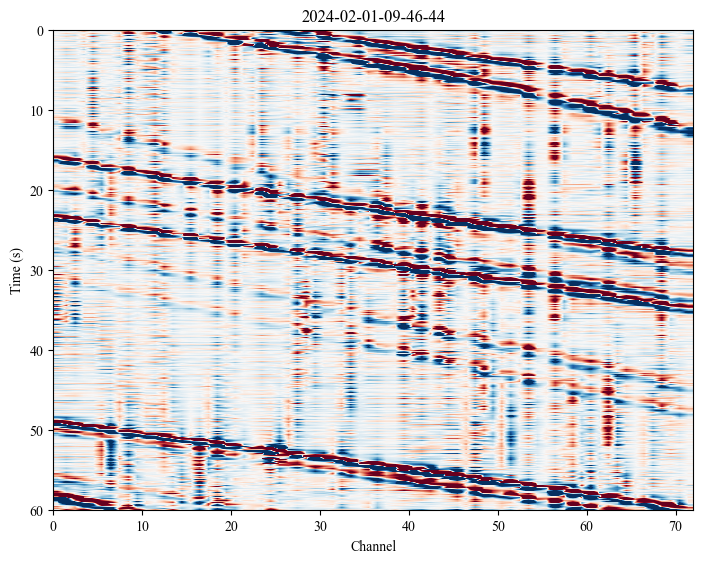

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
showRawData(ax, data, title=name, scale=200)

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.fft

def compute_fft(sr, dt, N=None):
    if N is None:
        N = len(sr)

    fsr = np.fft.fft(sr, n=N, axis=0)

    freq_sr = np.fft.fftfreq(len(fsr), dt)[:len(fsr)//2]
    fsr = np.abs(fsr[:len(fsr)//2])

    return freq_sr, fsr

freq, fft_result = compute_fft(data[:, 10], dt)


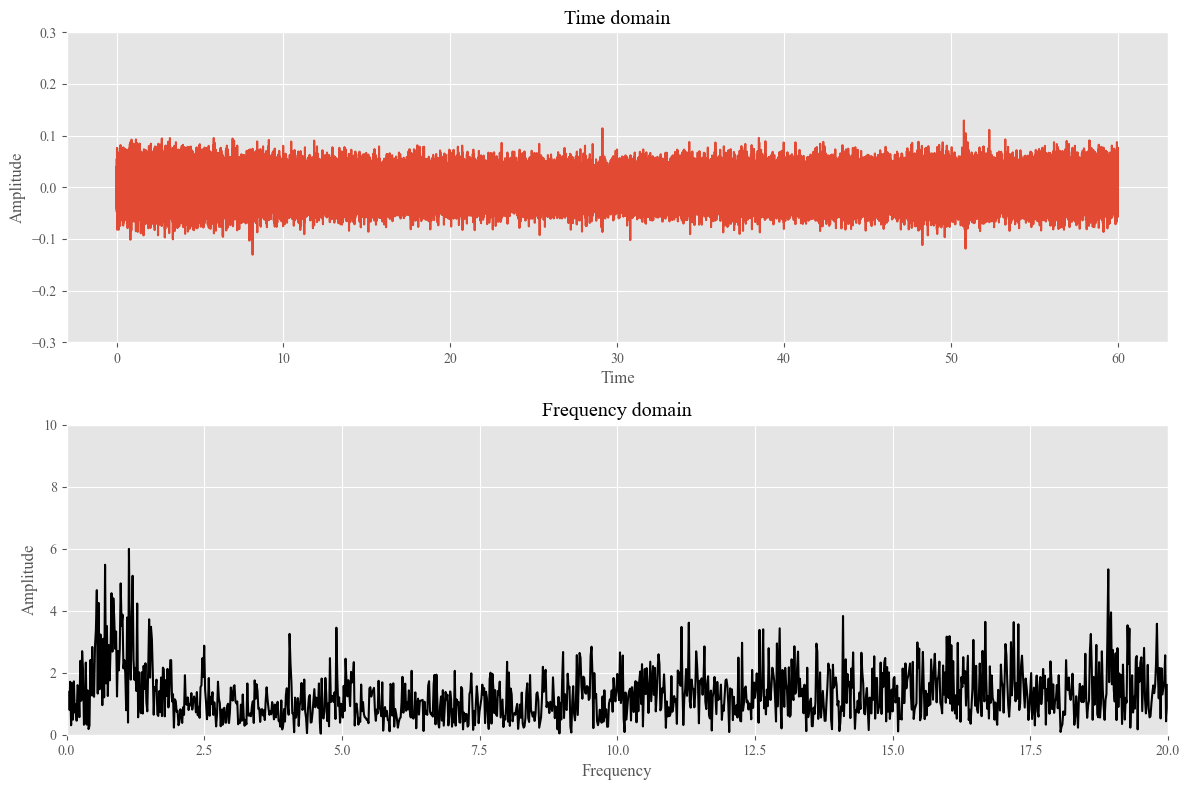

In [10]:
t = np.linspace(0, 60,len(data[:, 10]))

with plt.style.context('ggplot'):
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    axes[0].plot(t, data[:, 10])
    axes[0].set_ylim(-0.3, 0.3)
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Amplitude')
    axes[0].set_title('Time domain')
    axes[1].plot(freq, fft_result, 'k')
    axes[1].set_xlim(0, 20)
    axes[1].set_ylim(0, 10)
    axes[1].set_xlabel('Frequency')
    axes[1].set_ylabel('Amplitude')
    axes[1].set_title('Frequency domain')
    plt.tight_layout()

    

In [ ]:
x_hat = self.AE(x)
y_hat = tf.nn.conv2d(x_hat, impulse_response, padding="SAME", strides=1)

loss = criterion(x, y_hat)